In [ ]:
import store_in_redis
import search_in_redis
import pandas as pd
embedding_model = "nomic-embed-text"
chat_model = "mistral"
# "all-minilm:l6-v2", "nomic-embed-text", "mxbai-embed-large", "snowflake-arctic-embed:335m"
embedding_models = ["all-minilm:l6-v2", "nomic-embed-text", "mxbai-embed-large", "snowflake-arctic-embed:335m"]
chunk_sizes = [200, 500, 1000]
overlap_sizes = [0, 50, 100]

In [5]:
# df_results = pd.DataFrame(columns=["embedding_model", "chunk_size", "overlap_size"] + [f"recall@{k}" for k in range(1, 16)])
ground_truth = pd.read_csv("ground_truth.csv", sep="\t")
df_results = pd.read_csv("experiment_results.csv")

for embedding_model in embedding_models:
    for chunk_size in chunk_sizes:
        for overlap_size in overlap_sizes:
            print(f"Running with embedding model: {embedding_model}, chunk size: {chunk_size}, overlap size: {overlap_size}")
            store_in_redis.wipe_redis()
            embedding_dimension = store_in_redis.get_embedding_dimension(embedding_model)
            store_in_redis.redis_hnsw_index(embedding_dimension)
            pdf_files = store_in_redis.find_pdfs_in_subfolders("./archive/")
            store_in_redis.process_pdfs(embedding_model, pdf_files, chunk_size, overlap_size)
            results = {"embedding_model": embedding_model, "chunk_size": chunk_size, "overlap_size": overlap_size}
            for top_k in range(1, 16):
                print(f"Top {top_k} results:")
                recall = search_in_redis.compute_recall(embedding_model, ground_truth, top_k)
                results[f"recall@{top_k}"] = recall
            df_results = pd.concat([df_results, pd.DataFrame([results])], ignore_index=True)
            df_results.to_csv("experiment_results.csv", index=False)
            display(df_results)

Running with embedding model: snowflake-arctic-embed:335m, chunk size: 200, overlap size: 0
Created Redis HNSW index
Processing ./archive/data/data/INFORMATION-TECHNOLOGY/18176523.pdf
Chunk 0 on page 0 has 200 tokens
Stored embedding for: SENIOR INFORMATION TECHNOLOGY MANAGER Executive Summary Results-focused Information Technology management professional offering Twenty-Two years of progressive leadership experience. Transforms high-potential staff into outstanding leaders who demonstrate the creativity and savvy that is critical to both financial and operational success. Accomplished Manager with extensive experience in front-of-house and back-of-house operations. Proven ability to cut costs and decrease staff turnover. Cultivates a company culture in which staff members feel comfortable voicing questions and concerns, as well as contributing new ideas that drive company growth by challenging others beyond just doing the work, but, to bring creativity, ownership and pride i the work 

KeyboardInterrupt: 

In [ ]:
df_results = pd.read_csv("experiment_results.csv")

In [ ]:
import store_in_redis
import search_in_redis

embedding_model = "nomic-embed-text"
chat_model = "mistral"
dhruv_resume = store_in_redis.convert_pdf_to_text("Dhruv_Gandhi_Resume.pdf")
dhruv_resume = dhruv_resume[0]
dhruv_resume



'As a dedicated AI assistant specializing in resume guidance, please address the users query with precision. Query: Dhruv Gandhi\n(908)-306-9638 |gandhi.d@northeastern.edu |linkedin.com/in/dhruv-gandhi85 |github.com/DhruvGandhi85\nAvailable May 2025 |Boston, MA\nEducation\nNortheastern University Boston, MA\nKhoury College of Computer Science Expected Graduation: May 2025\nCandidate for Bachelor of Science in Data Science Khoury GPA: 3.82 /4.00\nCandidate for Minor in Business Analytics\nCandidate for Minor in Mathematics\nKey Courses: Machine Learning I & II, Algorithms and Data, Engineering LLM Systems\nNatural Language Processing, Object-Oriented Design, Database Design\nTechnical Skills\nLanguages : Java, Python, C++, SQL, JavaScript, HTML/CSS, R, Racket, bash\nFrameworks : React, Node.js, Flask\nTools : Snowflake, Databricks, IIS, Amazon Web Services, Tableau, Excel, Git, Docker\nExperience\nData Science Programmer (Internship) Jul 2024 - Dec 2024\nTufts Human Nutrition Research Center on Aging Boston, MA\n•Developed and implemented data quality control systems using Python and SQL to automatically identify and flag\noutliers/missing values in research data, ensuring enhancing data accuracy for clinical studies.\n•Enhanced cross-platform data integration and streamlined back-end operations by hosting a Flask server to relay\ninformation from a Linux back-end environment, improving the efficiency of data processing between production\nsoftware packages.\n•Collaborated with biostatisticians to translate complex research requirements into efficient programming solutions,\nsupporting advanced statistical analysis in the study of aging.\nData Analyst (Internship) Jun 2023 - Dec 2023\nSanofi Boston, MA\n•Utilized Python, SQL, and Apache Databricks for aggregating, segmenting, and clustering healthcare provider data\n(using the Latent Class Analysis algorithm). This identified their preferred interaction methods with\npharmaceutical companies, enabling the marketing team to optimize promotional mix models.\n•Employed SQL in a Snowflake environment to unify and cross-reference drug product information from various EU\ncountries into a consolidated master record. This initiative improved the accuracy of insights generated for\nmeasuring product performance and market competition.\n•Played a pivotal role in automating the weekly market data pipeline using R and SQL. Responsibilities included\ntransforming raw data into structured format, conducting data quality checks, and integrating the data with BI\ndashboards, substantially improving business consumption ease.\nAcademic Tutor in CS/Test Prep Jul–Aug (2021 & 2022)\nCCB School of Princeton Princeton, NJ\n•Instructed high school students in the use and application of Java, HTML/CSS, and Python, following Coursera\ncurriculum.\n•Engaged with students possessing limited technical experience, providing tailored instruction to enhance their\nunderstanding\n•Provided one-on-one tutoring for AWS Cloud Technical Essentials and Python Data Analysis certification prep.\nSelect Projects\nSpotAI Playlist Generator |Python, Spotify, openAI, Hastebin Apr 2023 – May 2023\n•Utilized OpenAI’s text-davinci-03 model to recommend songs from an inputted playlist\n•Applied Spotipy API to create a new Spotify playlist with documentation on Hastebin linked in description\nfootballBot Discord Bot |Python (discord.py, matplotlib, beautifulSoup), Git, AWS EC2 Jan 2023 – Mar 2023\n•Designed and developed a Discord bot that retrieves football player’s stats from NFL.com\n•Implemented features to allow users to get stats based on inputted arguments such as names, weeks, and years\n•Created visualizations of the stats to help users easily digest content and understand trends\n•Hosted on Amazon Web Services EC2 to ensure 24/7 accessibility \n Please elaborate on how the resume can be improved, and what should be added or removed based on similar entries. Answer:'

In [ ]:
query = f"{dhruv_resume} This is my resume. How can I improve it? What should I add or remove?"
search_in_redis.interactive_search(embedding_model=embedding_model, chat_model=chat_model, query=dhruv_resume, breakpoint=False)

In [ ]:
# while True:
ground_truth = search_in_redis.create_recall_test_set("./archive/")
recalls = []
for top_k in range(1, 16):
    print(f"Top {top_k} results:")
    recall = search_in_redis.compute_recall(embedding_model, ground_truth, top_k)
    recalls.append(recall)
# if recalls[-1] > 0.5:
ground_truth.to_csv("ground_truth.csv", index=False, sep="\t")
    # break

In [6]:
df_results = pd.read_csv("experiment_results.csv")
df_results.head()

,embedding_model,chunk_size,overlap_size,recall@1,recall@2,recall@3,recall@4,recall@5,recall@6,recall@7,recall@8,recall@9,recall@10,recall@11,recall@12,recall@13,recall@14,recall@15
0,all-minilm:l6-v2,200,0,0.326531,0.367347,0.387755,0.408163,0.428571,0.448980,0.469388,0.469388,0.489796,0.489796,0.510204,0.510204,0.510204,0.530612,0.530612
1,all-minilm:l6-v2,200,50,0.346939,0.367347,0.387755,0.408163,0.408163,0.408163,0.428571,0.448980,0.448980,0.489796,0.489796,0.469388,0.469388,0.489796,0.510204
2,all-minilm:l6-v2,200,100,0.285714,0.326531,0.346939,0.387755,0.387755,0.387755,0.408163,0.408163,0.408163,0.408163,0.408163,0.408163,0.408163,0.408163,0.428571
3,all-minilm:l6-v2,500,0,0.183673,0.244898,0.265306,0.326531,0.448980,0.510204,0.530612,0.530612,0.530612,0.551020,0.551020,0.551020,0.551020,0.551020,0.551020
4,all-minilm:l6-v2,500,50,0.224490,0.244898,0.265306,0.306122,0.367347,0.428571,0.469388,0.469388,0.510204,0.551020,0.551020,0.551020,0.551020,0.551020,0.551020


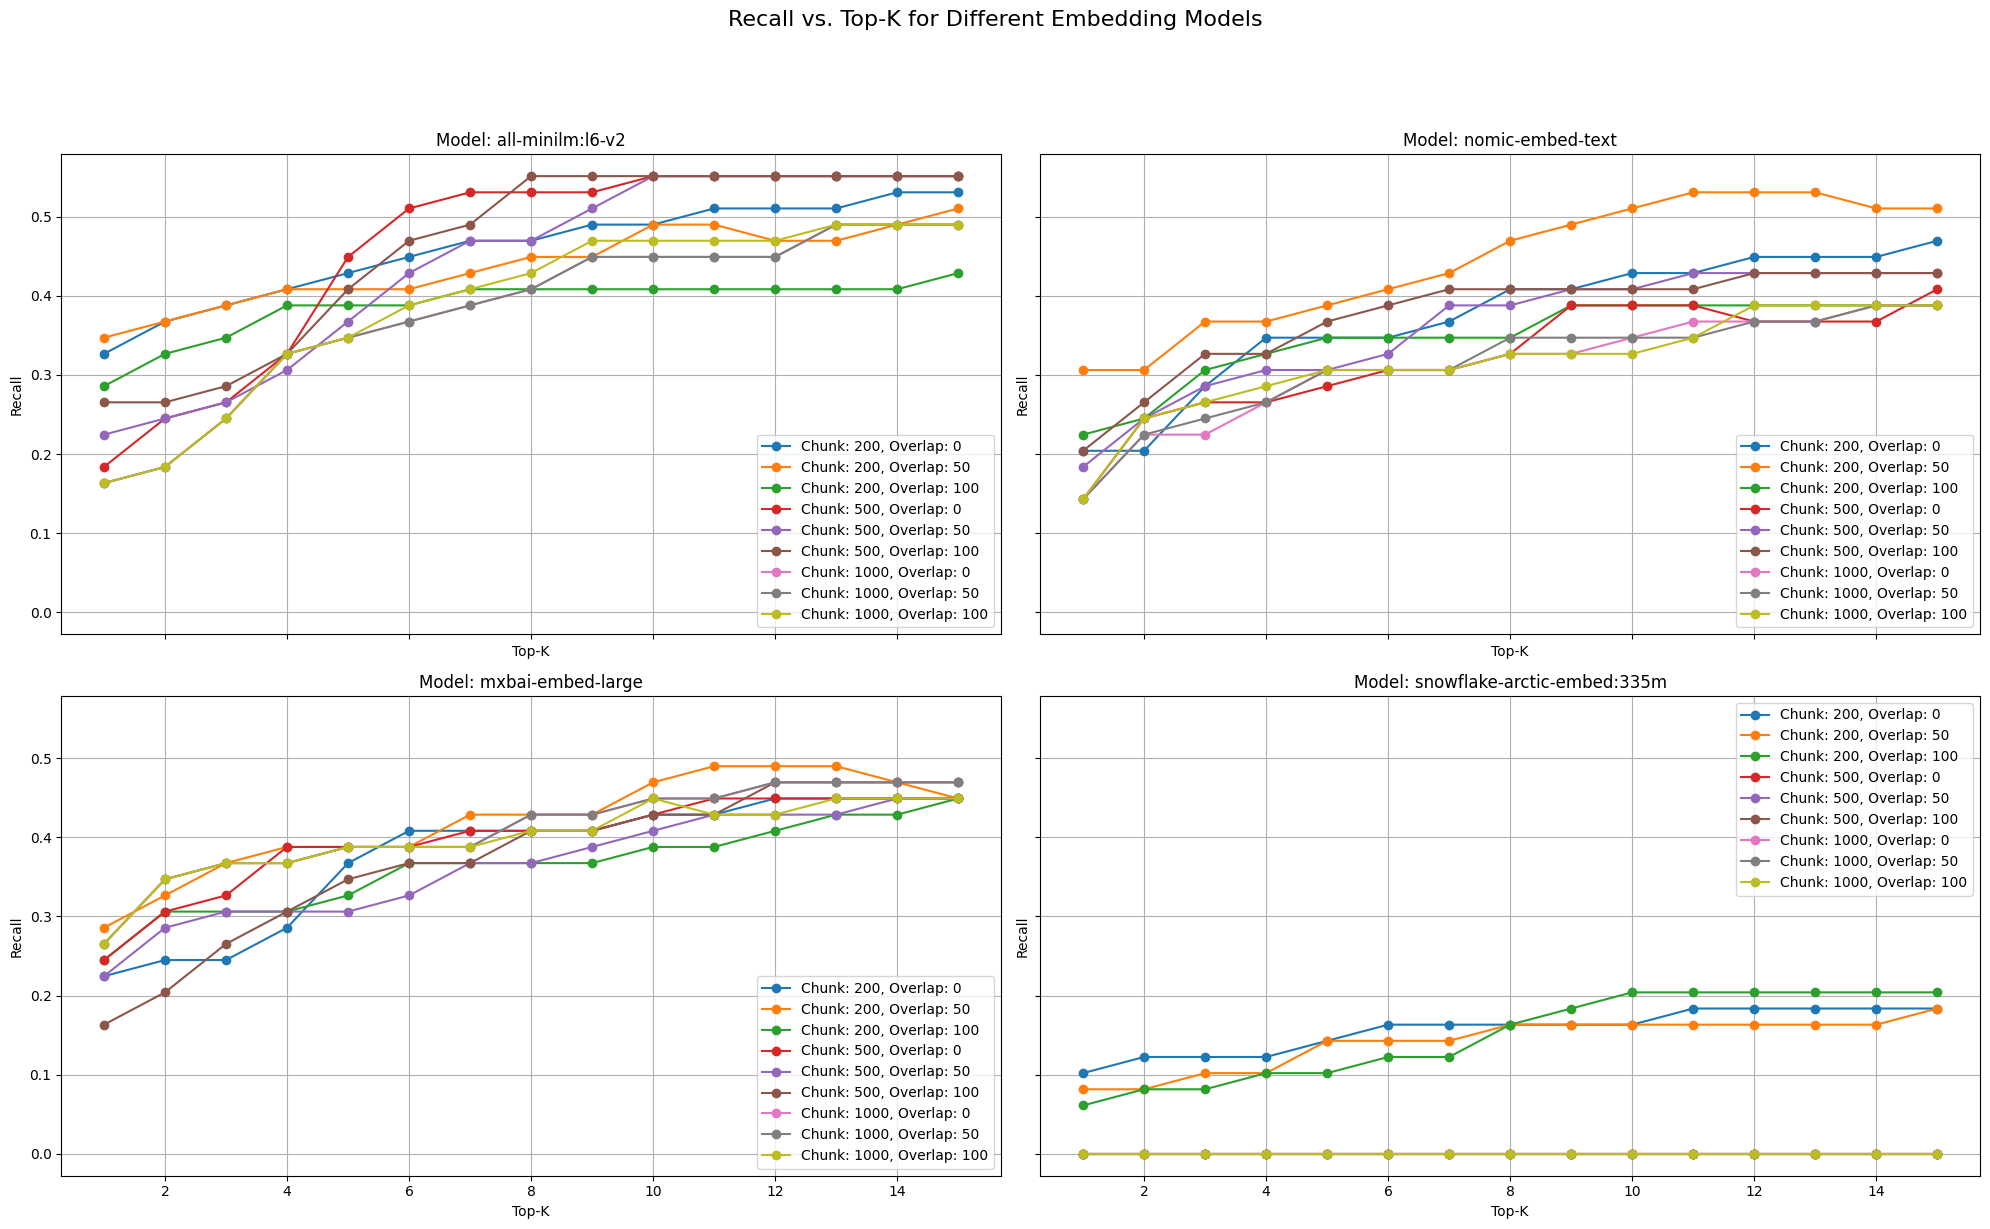

In [ ]:
# charts made by gemini

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("experiment_results.csv")

# Define the recall columns
recall_cols = [f"recall@{k}" for k in range(1, 16)]

# Get unique models
models = df['embedding_model'].unique()

# Determine the number of rows and columns for the grid
num_models = len(models)
num_cols = 2  # Adjust as needed (e.g., 2 columns for 4 models)
num_rows = (num_models + num_cols - 1) // num_cols  # Calculate rows to fit all models

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10 * num_cols, 6 * num_rows),
                        sharex=True, sharey=True)
fig.suptitle('Recall vs. Top-K for Different Embedding Models', fontsize=16, y=1.02)

# Iterate through models and plot in the grid
for i, model in enumerate(models):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]  # Get the current subplot

    # Iterate through chunk sizes and overlap sizes to plot
    for chunk_size in df['chunk_size'].unique():
        for overlap_size in df['overlap_size'].unique():
            # Filter data for the current model, chunk size, and overlap size
            data = df[(df['embedding_model'] == model) &
                      (df['chunk_size'] == chunk_size) &
                      (df['overlap_size'] == overlap_size)]

            # Plot if there's data for this combination
            if not data.empty:
                ax.plot(range(1, 16), data[recall_cols].values.flatten(),
                         marker='o', linestyle='-',
                         label=f'Chunk: {chunk_size}, Overlap: {overlap_size}')

    ax.set_title(f'Model: {model}')
    ax.set_xlabel('Top-K')
    ax.set_ylabel('Recall')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap
plt.show()

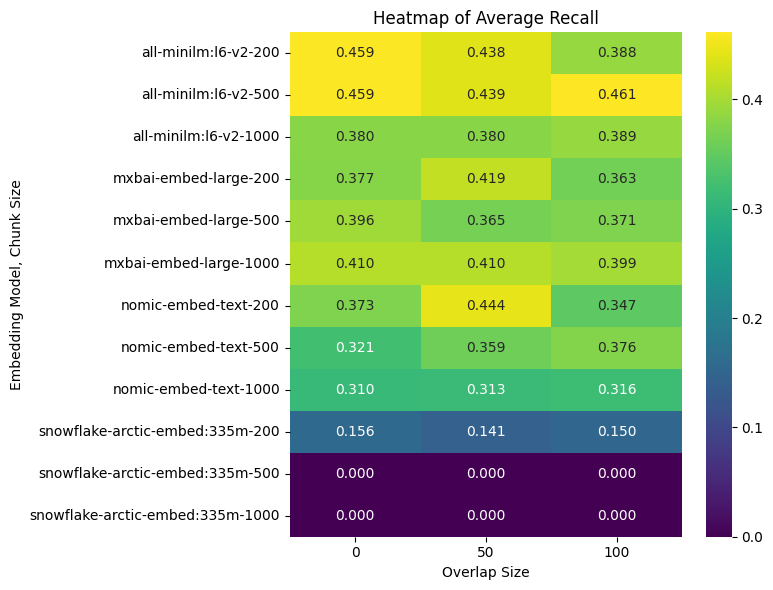

In [ ]:
# made by gemini
# --- 4. Heatmap of Average Recall for Different Configurations ---

# Calculate the average recall across all top-K for each configuration
df['average_recall'] = df[recall_cols].mean(axis=1)
pivot_table = df.pivot_table(values='average_recall', index=['embedding_model', 'chunk_size'], columns='overlap_size')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Heatmap of Average Recall')
plt.xlabel('Overlap Size')
plt.ylabel('Embedding Model, Chunk Size')
plt.tight_layout()
plt.show()



In [2]:
!streamlit run resume_llm_frontend.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.16.30.1:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
2025-04-14 17:14:31.656 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
RAG Search Interface
Enter blank input to quit
Query: Please elaborate on how the resume can be improved, and what should be added or removed based on similar entries.
An error occurred during the search: Error 61 connecting to localhost:6380. Connection refused.
context_str: 

 Response: 
 To improve your resume here are some suggestions based on the context you provided:    
1. Tailor your resume to each job application: Customize your resume for every position you apply for by emphasizing relevant skil